In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer_Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative_Biology  20972 non-null  int64 
 8   Quantitative_Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB
None


In [3]:
df['num_category'] = df[['Computer_Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative_Biology', 'Quantitative_Finance']].sum(axis=1)
df.head()

,ID,TITLE,ABSTRACT,Computer_Science,Physics,Mathematics,Statistics,Quantitative_Biology,Quantitative_Finance,num_category
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,1
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,2


In [4]:
category_df = df.loc[:, 'Computer_Science':'Quantitative_Finance']

# Print the sum of values in each category column
print(category_df.sum())


Computer_Science        8594
Physics                 6013
Mathematics             5618
Statistics              5206
Quantitative_Biology     587
Quantitative_Finance     249
dtype: int64


In [5]:
def plot_distributions(df, start_col, end_col):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot subject distribution
    category_df = df.loc[:, start_col:end_col]
    category_counts = category_df.sum()
    ax = category_counts.plot(kind='bar', ax=axs[0])
    ax.set_title('Distribution of Papers Across Categories')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Papers')
    ax.tick_params(axis='x', rotation=45)
    for i, v in enumerate(category_counts):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

    # Plot number of label distribution
    category_counts = df['num_category'].value_counts().sort_index()
    ax = category_counts.plot(kind='bar', ax=axs[1])
    ax.set_title('Distribution of Papers by Number of Labels')
    ax.set_xlabel('Number of Labels')
    ax.set_ylabel('Number of Papers')
    ax.tick_params(axis='x', rotation=0)
    for i, v in enumerate(category_counts):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# Entire dataset distribution

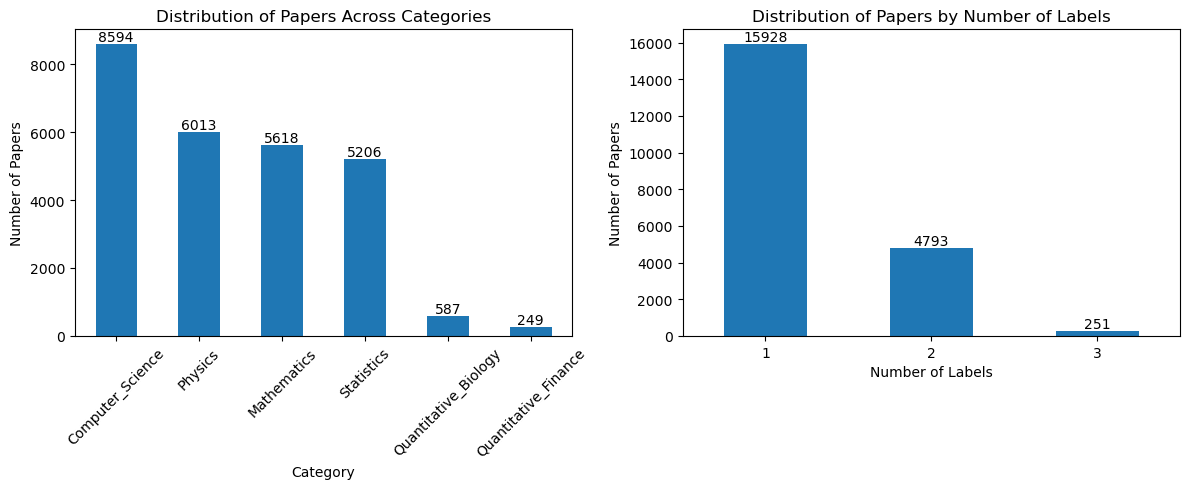

In [6]:
#original dataset
plot_distributions(df, 'Computer_Science', 'Quantitative_Finance')

# Papers that belong to only one category

In [17]:
# Select rows where 'num_category' column is 1 (i.e., papers that belong to only one category)
one_category_df = df[df['num_category'] == 1]
one_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15928 entries, 0 to 20969
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    15928 non-null  int64 
 1   TITLE                 15928 non-null  object
 2   ABSTRACT              15928 non-null  object
 3   Computer_Science      15928 non-null  int64 
 4   Physics               15928 non-null  int64 
 5   Mathematics           15928 non-null  int64 
 6   Statistics            15928 non-null  int64 
 7   Quantitative_Biology  15928 non-null  int64 
 8   Quantitative_Finance  15928 non-null  int64 
 9   num_category          15928 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.3+ MB


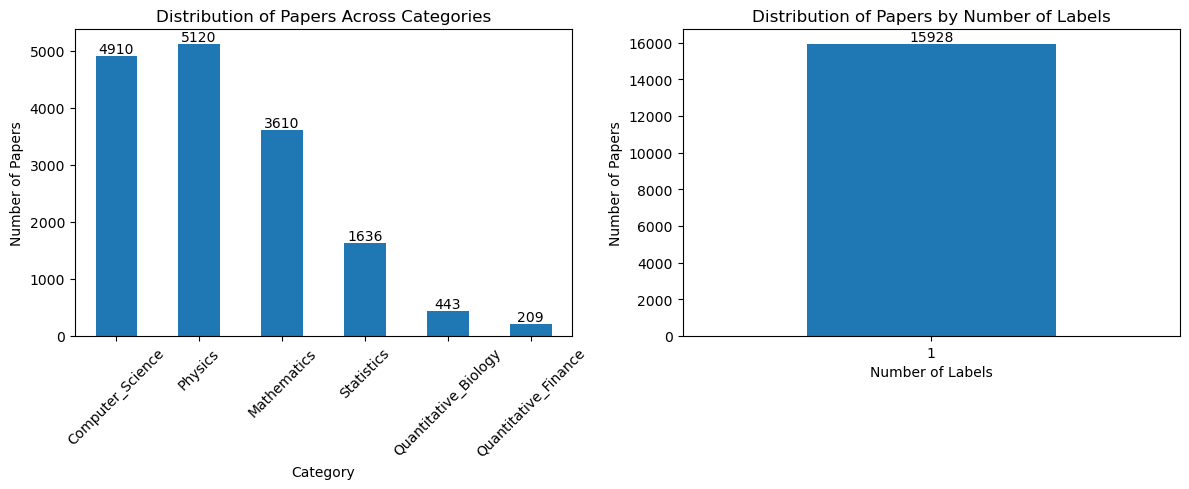

In [13]:
#papers that belong to only one category
plot_distributions(one_category_df, 'Computer_Science', 'Quantitative_Finance')

In [22]:
four_category_df = one_category_df.drop(columns=['Quantitative_Biology', 'Quantitative_Finance'])
num_papers_per_category = one_category_df.Statistics.sum()
print("Number of available papers for the category 'Statistics': ", num_papers_per_category)

# Sample 1636 papers from each category
sampled_df = pd.concat([
    four_category_df[four_category_df['Computer_Science'] == 1].sample(num_papers_per_category, replace=True),
    four_category_df[four_category_df['Physics'] == 1].sample(num_papers_per_category, replace=True),
    four_category_df[four_category_df['Mathematics'] == 1].sample(num_papers_per_category, replace=True),
    four_category_df[four_category_df['Statistics'] == 1].sample(num_papers_per_category, replace=True)
], ignore_index=True)


Number of available papers for the category 'Statistics':  1636


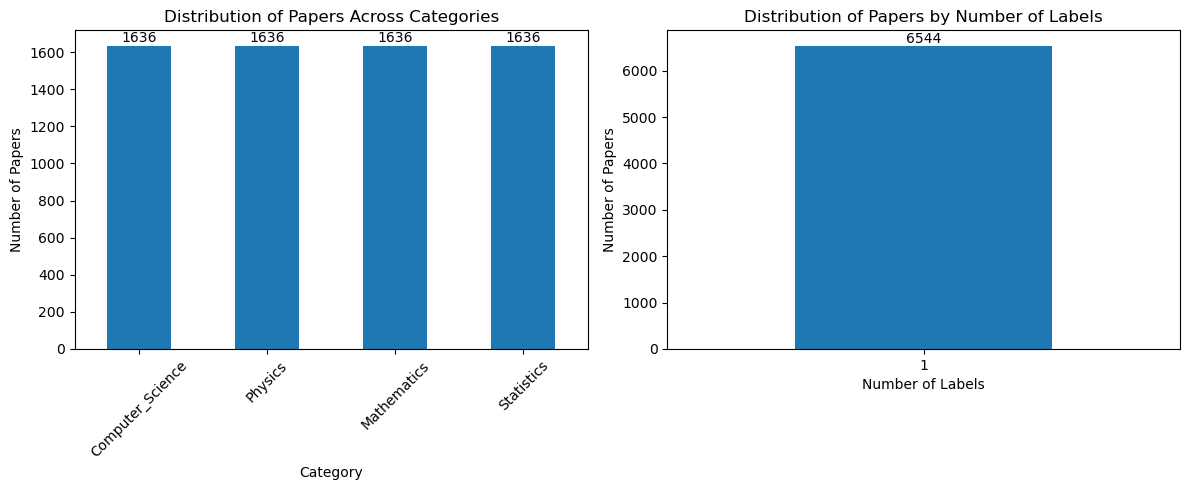

In [15]:
#sample dataset with four categories
plot_distributions(sampled_df, 'Computer_Science', 'Statistics')

In [16]:
sampled_df = sampled_df.drop(columns=['num_category'])
# save the sampled df to a new csv file
sampled_df.to_csv('four_category_dataset.csv', index=False)

# sample dataset based on the mininum category

In [23]:
# Define the number of papers to sample from each category
# we set to 209, which is based on the number of papers belonging to 'Quantitative_Finance' subject 
# since it has the smallest number of papers among the six categories
num_papers_per_category = one_category_df.Quantitative_Finance.sum()
print("Number of available papers for the category 'Quantitative_Finance': ", num_papers_per_category)

# Sample 209 papers from each category
sampled_df = pd.concat([
    one_category_df[one_category_df['Computer_Science'] == 1].sample(num_papers_per_category, replace=True),
    one_category_df[one_category_df['Physics'] == 1].sample(num_papers_per_category, replace=True),
    one_category_df[one_category_df['Mathematics'] == 1].sample(num_papers_per_category, replace=True),
    one_category_df[one_category_df['Statistics'] == 1].sample(num_papers_per_category, replace=True),
    one_category_df[one_category_df['Quantitative_Biology'] == 1].sample(num_papers_per_category, replace=True),
    one_category_df[one_category_df['Quantitative_Finance'] == 1].sample(num_papers_per_category, replace=True)
], ignore_index=True)


Number of available papers for the category 'Quantitative_Finance':  209


In [24]:
sampled_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    1254 non-null   int64 
 1   TITLE                 1254 non-null   object
 2   ABSTRACT              1254 non-null   object
 3   Computer_Science      1254 non-null   int64 
 4   Physics               1254 non-null   int64 
 5   Mathematics           1254 non-null   int64 
 6   Statistics            1254 non-null   int64 
 7   Quantitative_Biology  1254 non-null   int64 
 8   Quantitative_Finance  1254 non-null   int64 
 9   num_category          1254 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 98.1+ KB


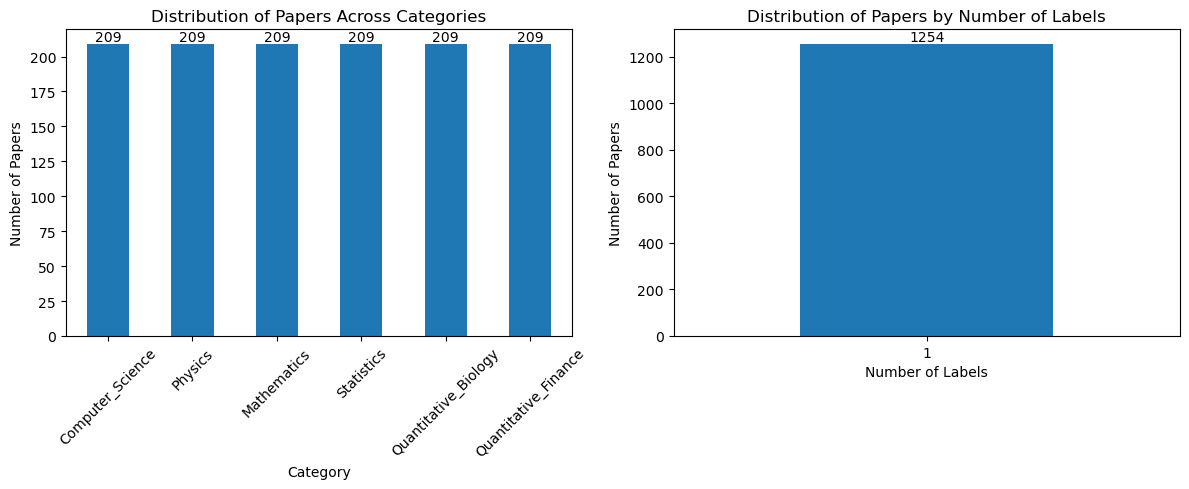

In [25]:
#sample dataset with six categories
plot_distributions(sampled_df, 'Computer_Science', 'Quantitative_Finance')

In [26]:
sampled_df = sampled_df.drop(columns=['num_category'])
# save the sampled df to a new csv file
sampled_df.to_csv('six_category_dataset.csv', index=False)

# sample dataset with only five categories

In [28]:
# Define the number of papers to sample from each category
# we set to 443, which is based on the number of papers belonging to 'Quantitative_Biology' subject 
# and exclude the 'Quantitative_Finance' subject
# we will focus on the first five categories
num_papers_per_category = one_category_df.Quantitative_Biology.sum()
print("Number of available papers for the category 'Quantitative_Biology': ", num_papers_per_category)

five_category_df = one_category_df.drop(columns=['Quantitative_Finance'])

# Sample 443 papers from each category
five_category_df = pd.concat([
    five_category_df[five_category_df['Computer_Science'] == 1].sample(num_papers_per_category, replace=True),
    five_category_df[five_category_df['Physics'] == 1].sample(num_papers_per_category, replace=True),
    five_category_df[five_category_df['Mathematics'] == 1].sample(num_papers_per_category, replace=True),
    five_category_df[five_category_df['Statistics'] == 1].sample(num_papers_per_category, replace=True),
    five_category_df[five_category_df['Quantitative_Biology'] == 1].sample(num_papers_per_category, replace=True)
], ignore_index=True)


Number of available papers for the category 'Quantitative_Biology':  443


In [29]:
five_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2215 non-null   int64 
 1   TITLE                 2215 non-null   object
 2   ABSTRACT              2215 non-null   object
 3   Computer_Science      2215 non-null   int64 
 4   Physics               2215 non-null   int64 
 5   Mathematics           2215 non-null   int64 
 6   Statistics            2215 non-null   int64 
 7   Quantitative_Biology  2215 non-null   int64 
 8   num_category          2215 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 155.9+ KB


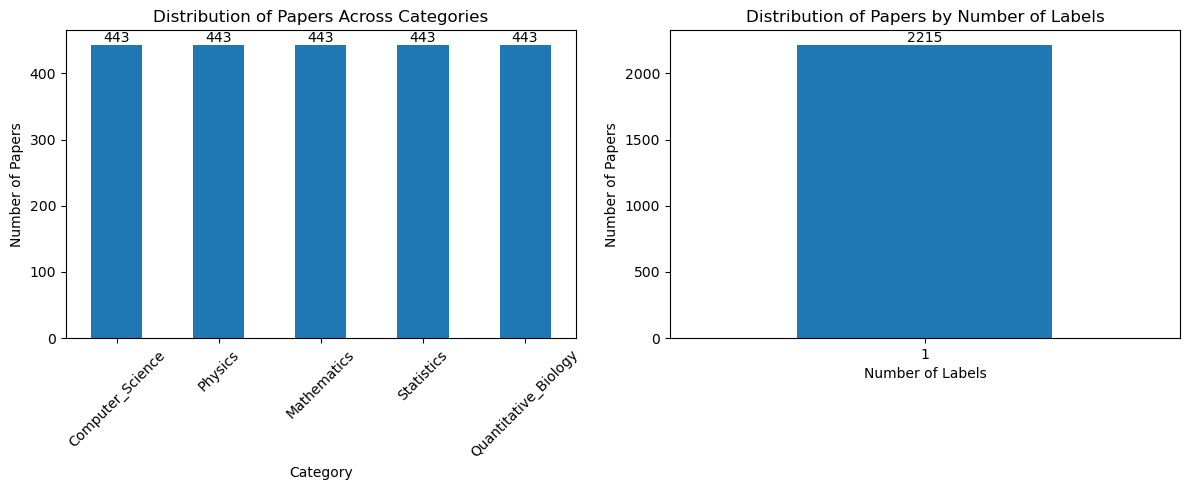

In [30]:
#sample dataset with five categories
plot_distributions(five_category_df, 'Computer_Science', 'Quantitative_Biology')

In [31]:
# drop the number of category as it is unnecessary
five_category_df = five_category_df.drop(columns=['num_category'])

# save the sampled df to a new csv file
five_category_df.to_csv('five_category_dataset.csv', index=False)